In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, MetaData, inspect
from sqlalchemy.ext.declarative import declarative_base
Base = declarative_base()
from sqlalchemy import Column, Integer, String, Float

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
#data_m = engine.execute("Select * from measurement")
#data_s = engine.execute("Select * from station")
conn = engine.connect()
metadata = MetaData()
metadata.reflect(engine, only=['measurement', 'station'])



In [6]:
Base = automap_base(metadata=metadata)
Base.prepare()

In [7]:
# reflect an existing database into a new model
# reflect the tables
measurement = Base.classes.measurement
station = Base.classes.station
session = Session(engine)
for row in session.query(measurement, measurement.station).limit(5).all():
    print(row)

(<sqlalchemy.ext.automap.measurement object at 0x000001892CB6A340>, 'USC00519397')
(<sqlalchemy.ext.automap.measurement object at 0x000001892CB6A490>, 'USC00519397')
(<sqlalchemy.ext.automap.measurement object at 0x000001892CB6A520>, 'USC00519397')
(<sqlalchemy.ext.automap.measurement object at 0x000001892CB6A580>, 'USC00519397')
(<sqlalchemy.ext.automap.measurement object at 0x000001892CB6A5E0>, 'USC00519397')


In [8]:
inspector = inspect(engine)
inspector.get_table_names()


['measurement', 'station']

In [9]:
# We can view all of the classes that automap found
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])


id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


# Exploratory Climate Analysis

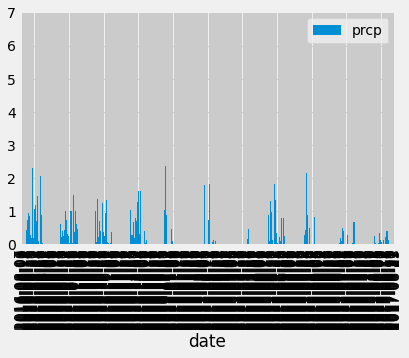

In [10]:
# # Design a query to retrieve the last 12 months of precipitation data and plot the results
# data_m = engine.execute("Select prcp, date from measurement")
# data_m.fetchall()
df = pd.read_sql("Select prcp, date from measurement", conn)
rains = df.tail(365)
rains
rains.plot(kind='bar',x='date',y='prcp')
plt.show()



In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe(include='all')

,prcp,date
count,18103.000000,19550
unique,NaN,2792
top,NaN,2015-09-21
freq,NaN,9
mean,0.160644,NaN
std,0.468746,NaN
min,0.000000,NaN
25%,0.000000,NaN
50%,0.010000,NaN
75%,0.110000,NaN


In [12]:
# Design a query to show how many stations are available in this dataset?
df2 = pd.read_sql("Select * from measurement", conn)

uniqueValues = df2['station'].unique()
 
print('There are 9 stations available: ')
print(uniqueValues)

There are 9 stations available: 
['USC00519397' 'USC00513117' 'USC00514830' 'USC00517948' 'USC00518838'
 'USC00519523' 'USC00519281' 'USC00511918' 'USC00516128']


In [13]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
df3 = df2['station'].value_counts()
df3



USC00519281    2772
USC00519397    2724
USC00513117    2709
USC00519523    2669
USC00516128    2612
USC00514830    2202
USC00511918    1979
USC00517948    1372
USC00518838     511
Name: station, dtype: int64

In [14]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
mintemp = df2['tobs'].min()
maxtemp = df2['tobs'].max()
avgtemp = df2['tobs'].mean()
 
print('lowest temp: ')
print(mintemp)
print('highest temp: ')
print(maxtemp)
print('average temp: ')
print(avgtemp)

lowest temp: 
53.0
highest temp: 
87.0
average temp: 
73.09795396419437


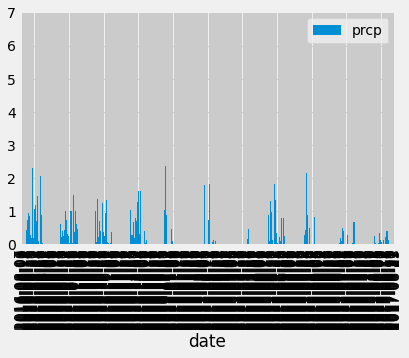

In [15]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
change = df2.set_index('station')
change2 = change.drop('USC00519397')
change3 = change2.drop('USC00513117')
change4 = change3.drop('USC00519523')
change5 = change4.drop('USC00516128')
change6 = change5.drop('USC00514830')
change7 = change6.drop('USC00511918')
change8 = change7.drop('USC00517948')
hange9 = change8.drop('USC00518838')
last_months = hange9.tail(365)
rains.plot(kind='bar',x='date',y='prcp')
plt.show()





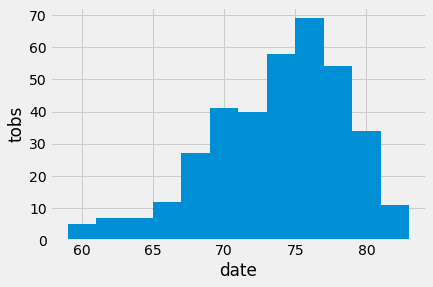

In [17]:
plt.hist(last_months['tobs'], bins=12)
plt.xlabel('date')
plt.ylabel('tobs')
plt.savefig ("Temperature ")